# Sentiment Analysis on notable speeches of the last decade

---

This tutorial demonstrates how to build a simple <a href = 'https://en.wikipedia.org/wiki/Long_short-term_memory'> Long Short Term memory network (LSTM) </a> from scratch in NumPy to perform sentiment analysis on a socially relevant and ethically acquired dataset

You will first process textual data and convert it to a numeric format that the machine understands. As a part of the data preprocessing, you will clean the text and denoise it by removing stopwords, punctuation and HTML tags. You will then build a dictionary and allot a unique index to each word which will be helpful when you replace them with their pretrained numeric representations a.k.a word embeddings. 

Your deep learning model - The LSTM is a form of a Recurrent Neural Network and will learn to classify a piece of text as positive or negative from the IMDB reviews dataset. The dataset contains 40,000 training and 10,000 test reviews and corresponding labels. Based on the numeric representations of these reviews and their corresponding labels <a href = 'https://en.wikipedia.org/wiki/Supervised_learning'> (supervised learning) </a> the neural network will be trained to learn the sentiment using forward propagation and backpropagaton through time since we are dealing with sequential data here. The output will be a vector containing the probabilities that the text samples are positive. 

> Today, Deep Learning is getting adopted in everyday life and now it is more important to ensure that decisions that have been taken using AI are not reflecting discriminatory behavior towards a set of populations. It is important to take fairness into consideration while consuming the output from AI. Throughout the tutorial we'll try to question all the steps in our pipeline from an ethics point of view.

## Prerequisites 

---

You are expected to be familiar with the language python, array manipulation with NumPy, linear algebra and Calculus. You should also be familiar with how Neural Networks work.

To refresh your memory you can take the [Python](https://docs.python.org/dev/tutorial/index.html), [Linear algebra on n-dimensional arrays](https://numpy.org/doc/stable/user/tutorial-svd.html) and [Calculus](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html) tutorials. implemented.

You are advised to read the [Deep learning](http://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf) paper published in 2015 by Yann LeCun, Yoshua Bengio, and Geoffrey Hinton who are regarded as some of the pioneers of the field. You should also consider reading [the d2l.ai book](https://d2l.ai/chapter_recurrent-neural-networks/index.html), which is an interactive deep learning book with multi-framework code, math, and discussions. You can also go through the [Deep learning on MNIST from scratch tutorial](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) to understand how a basic neural network is implemented from scratch.

In addition to NumPy, you will be utilizing the following Python standard modules for data loading and processing:
- [`pandas`](https://pandas.pydata.org/docs/) for handling dataframes 
- [`re`](https://docs.python.org/3/library/re.html) for tokenising textual data 
- [`string`](https://docs.python.org/3/library/string.html) for string operations  

    as well as:
- [Matplotlib](https://matplotlib.org/) for data visualization

This tutorial can be run locally in an isolated environment, such as [Virtualenv](https://virtualenv.pypa.io/en/stable/) or [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html). You can use [Jupyter Notebook or JupyterLab](https://jupyter.org/install) to run each notebook cell. Don't forget to [set up NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html#installing-numpy) and [Matplotlib](https://matplotlib.org/users/installing.html#installing-an-official-release).

## Table of contents

---

1. Data Collection 

2. Preprocess the datasets

3. Build and train a LSTM network from scratch

4. Perform sentiment analysis on collected speeches 

5. Next steps

In [1]:
# Importing the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib as plt 
from text_preprocessing import TextPreprocess 
import string

## 1. Data Collection
----

Before we begin there are a few pointers you should always keep in mind before choosing the data you wish to train your model on:
- Unless you have their consent, your data should not link back to named people. It's difficult to obtain a hundred percent anonymous datasets hence it should be made clear to the users that you're minimizing the risk and possible harm of data leaks 
- [Trevisan and Reilly](https://eprints.whiterose.ac.uk/91157/1/Ethical%20dilemmas.pdf) identified a list of sensitive topics that need to be handled with extra care. We present the same below along with a few additions:
    - personal daily routines (including location data);
    - individual details about impairment and/or medical records;
    - emotional accounts of pain and chronic illness;
    - financial information about income and/or welfare payments;
    - discrimination and abuse episodes;
    - criticism/praise of individual providers of healthcare and support services
    - suicidal thoughts;
    - Criticism/praise of a power structure especially if it compromisies their safety
    - Personally-identifying information (even if anonymized in some way) including things like fingerprints or voice

- While it can be difficult taking consent from so many people especially on online platforms, the necessity of it depends upon the sensitivity of the topics your data includes and other indicators like whether the platform the data was obtained from allows users to operate under pseudonyms. If the website has a policy that forces the use of a real name, then the users need to be asked for consent 

In this section, you will be collecting two different datasets, the IMDB movie reviews dataset and a collection of 10 speeches curated for this tutorial including activists from different countries around the world, different times, and different topics. The former would be used to train the deep learning model while the latter will be used to perform sentiment analysis on.

### Collecting the IMDB reviews dataset
The IMDB dataset can be found on the website by [Stanford AI Lab](http://ai.stanford.edu/~amaas/data/sentiment/). To make things a bit simpler we're using the dataframe version downloaded from [Kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
   > The IMDb platform allows the usage of their public datasets for personal and non-commercial use. We did our best to ensure that these reviews do not contain any of the aforementioned sensitive topics pertaining to the reviewer.

### Collecting and loading the speech transcripts
We have chosen speeches by activists around the globe talking about issues like climate change, feminism, lgbtqa+ rights and racism. These were sourced them from newspapers, the official website of the United Nations and the archives of established universities as cited in the table below. A csv file was created containing the transcribed speeches, their speaker and the source the speeches were obtained from. 
We made sure to include different demographics in our data and included a range of different topics, most of which focus on social and/or ethical issues. The dataset is subjected to the CCO Creative Common License, which means that is free for the public to use and there are no copyrights reserved.

| Speech                                           | Speaker                 | Source                                                     |
|--------------------------------------------------|-------------------------|------------------------------------------------------------|
| Barnard College Commencement                     | Leymah Gbowee           | Barnard College - Columbia University official website     |
| UN Speech on youth Education                     | Malala Yousafzai        | Iowa state university archives                             |
| Remarks in the UNGA on racial discrimination     | Linda Thomas Greenfield | United States mission to the United Nation                 |
| How Dare You                                     | Greta Thunberg          | NBC’s official website                                     |
| The speech that silenced the world for 5 minutes | Severn Suzuki           | NTU blogs                                                  |
| The Hope Speech                                  | Harvey Milk             | University of Maryland archives                            |
| Violence against LGBTQA+                         | Michelle Bachelet       | United Nations office of high commisioner official website |
| I have a dream                                   | Martin Luther King      | Brittanica official website                                                                                                                    

## 2. Preprocess the datasets
>Preprocessing data is an extremely crucial step before building any Deep learning model, however in an attempt to keep the tutorial focused on building the model, we will not dive deep into the code for preprocessing. Given below is a brief overview of all the steps we undertake to clean our data and convert it to its numeric representation. The code is public and we encourage you to look it up for a better understanding of this section

1. **Text Denoising** : Before converting your text into vectors, it is important to clean it and remove all unhelpful parts a.k.a the noise from your data by converting all characters to lowercase, removing html tags, brackets and stop words (words that don't add much meaning to a sentence). Without this step the dataset is often a cluster of words that the computer doesn't understand.


2. **Tokenization** : So far the text we have is in its raw form, it needs to be broken apart into chunks called tokens because the most common way of processing language happens at the token level. This process of separating a piece of text into smaller units is called Tokenisation. The tokens obtained are then used to build a vocabulary. Vocabulary refers to a set of all tokens in the corpus along with a unique index allotted to each of them.


3. **Converting words to vectors** : A word embedding is a learned representation for text where words that have the same meaning have a similar representation. Individual words are represented as real-valued vectors in a predefined vector space. GloVe is n unsupervised algorithm developed by Stanford for generating word embeddings by generating global word-word co-occurence matrix from a corpus. You can download the zipped files containing the embeddings from https://nlp.stanford.edu/projects/glove/. Here you can choose any of the four options for different sizes or training datasets
 >The GloVe word embeddings include sets that were trained on billions of tokens, some up to 840 billion tokens. These algorithms exhibit stereotypical biases, such as gender bias which can be traced back to the original training data. For example certain occupations seem to be more biased towards a particular gender, reinforcing problematic stereotypes. The nearest solution to this problem are some de-biasing algorithms as the one presented in https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/reports/6835575.pdf which one can use on embeddings of their choice to mitigate bias, if present.

In [2]:
imdb_data_path = 'IMDB Dataset.csv'
emb_path = 'glove.6B.300d.txt'
imdb_textproc = TextPreprocess(imdb_data_path, emb_path)
X,y = imdb_textproc.cleantext('review', target_column = 'sentiment', remove_stopwords = True, remove_punc = True)
X_train, Y_train,X_test, Y_test = imdb_textproc.split_data(X, y, split_percentile=10)
imdb_voc = imdb_textproc.create_voc(X_train)
imdb_emb_matrix = imdb_textproc.emb_matrix()
X_train_indices = imdb_textproc.transform_input(X_train)

hi hello cleaning text


/Users/dbhasin/Desktop/Quansight/lstm/server/text_preprocessing.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  data_without_stopwords[f'clean_{text_column}'] = data_without_stopwords[f'clean_{text_column}'].str.replace('[{}]'.format(string.punctuation), ' ')


Loading Glove Model
400000  words loaded!


In [ ]:
speech_data_path = 'speeches.csv'
speech_textproc = TextPreprocess(speech_data_path, emb_path)
X_pred = speech_textproc.cleantext('speech', remove_stopwords = True, remove_punc = False)
speech_voc = speech_textproc.create_voc(X_pred)
speech_emb_matrix = speech_textproc.emb_matrix()

### 3. Build the Deep Learning Model¶
 ---
 It’s time to start implementing our LSTM! You will have to first familiarize yourself with some high-level concepts of the basic building blocks of a deep learning model. You can refer to the [Deep learning on MNIST from scratch tutorial](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) for the same. 

You will then learn how a Recurrent Neural Network differs from a plain Neural Network and what makes it so suitable for processing sequential data. Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to classify the sentiment of a piece of text as positive or negative with a certain level of accuracy

### Introduction to a Long Short Term Memory Network

In a plain neural network, the information only moves in one direction — from the input layer, through the hidden layers, to the output layer. The information moves straight through the network and never takes the previous nodes into account at a later stage. Because it only considers the current input, it has no notion of order in time. It simply can’t remember anything about what happened in the past except its training.

In a RNN the information cycles through a loop. When it makes a decision, it considers the current input and also what it has learned from the inputs it received previously. 

The problem with an RNN however, is that the influence of a given input on the hidden layer, and therefore on the network output, either decays or blows up exponentially as it cycles around the network’s recurrent connections. This shortcoming is referred to as the vanishing gradient problem. Long Short-Term Memory (LSTM) is an RNN architecture specifically designed to address the vanishing gradient problem.

### Overview of the Model Architecture 

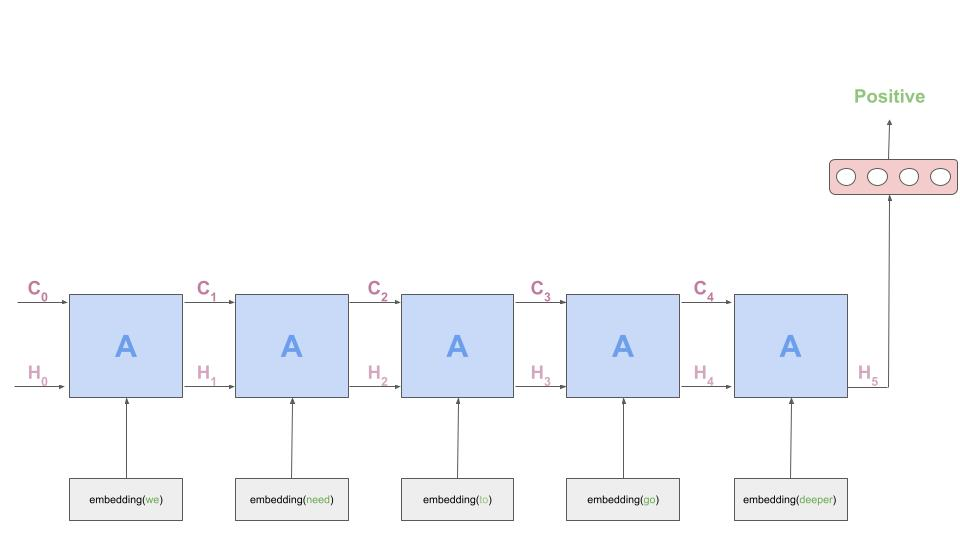

In the above image, The rectangles labelled 'A' are called `Cells` and they are the **Memory Blocks** of our LSTM network. They are responsible for choosing what to remember in a sequence and pass on that information to the next cell via two states called the `hidden state` $H_{t}$ and the `cell state` $C_{t}$ where $t$ indicates the time-step. To know how these states are calculated you'll need to understand the mechanisms happening inside a cell. 

<div>
     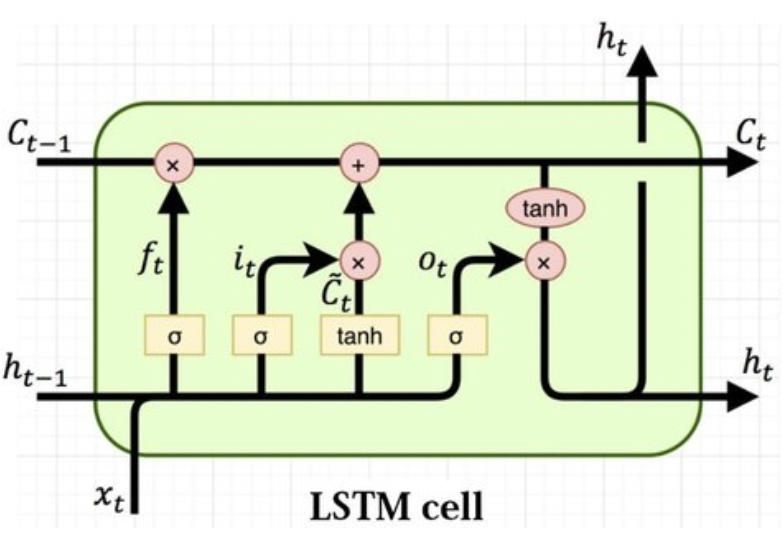
</div>

There are three major mechanisms that happen inside a cell, called `gates`. Given below is a brief overview of what each gate does:
- **Forget Gate** : A forget gate is responsible for removing information from $C_{t-1}$ i.e the previous cell state. The information that is no longer required for the LSTM to understand things or the information that is of less importance is removed via multiplication of a filter $f_{t}$.
    - *Input* : $[H_{t-1}  X_{t}]$
    - $f_{t}$ = $sigmoid$(*Input*)
    - *Output* : $f_{t}$
    
- **Input Gate** : The input gate is responsible for the addition of information to the cell state. There are two main components $i_{t}$ and $cc_{t}$ where $cc_{t}$ is a vector containing all possible values that can be added to the cell state and $i_{t}$ acts as a filter for all the information contained in $c_{t}$
    - *Input* : $[H_{t-1}  X_{t}]$
    -  $i_{t}$ = $sigmoid$(*Input*), $cc_{t}$ = $tanh$(*Input*)
    - *Output* : $i_{t}$ * $cc_{t}$ 
    
Once we have the outputs of our **Input Gate** and **Forget Gate**, we can use these to update the previous cell state $c_{t-1}$ to the current cell state $c_{t}$ as shown in the following equation:

$c_{t}$ = $c_{t-1}$ * $f_{t}$  + $i_{t}$ 

- **Output Gate** : The output gate is responsible for selecting useful information from the current cell state. It works similarly as the input gate and gives as output the hidden state that will be passed on to the next cell.
    - *Input* : $[H_{t-1}  X_{t}]$,  $c_{t}$
    - $o_{t}$ = $sigmoid$($[H_{t-1}  X_{t}]$),  $co_{t}$ = $tanh$($c_{t}$)
    - *Output* :$o_{t}$ * $co_{t}$
    
 $h_{t}$ = $o_{t}$ * $co_{t}$

In [26]:
def initialise_params (hidden_dim, input_dim):
        Wf = np.random.randn(hidden_dim, hidden_dim + input_dim) # forget gate 
        bf = np.random.randn(hidden_dim, 1)
        Wi = np.random.randn(hidden_dim, hidden_dim + input_dim) # input gate 
        bi = np.random.randn(hidden_dim, 1)
        Wc = np.random.randn(hidden_dim, hidden_dim + input_dim) # cell state 
        bc = np.random.randn(hidden_dim, 1)
        Wo = np.random.randn(hidden_dim, hidden_dim + input_dim) # output gate 
        bo = np.random.randn(hidden_dim, 1)
        
        W2 = np.random.randn(1, hidden_dim)
        b2 = np.zeros((1, 1))

        parameters = {"Wf": Wf, "bf": bf, "Wi": Wi, "bi": bi, "Wc": Wc, "bc": bc, "Wo": Wo, "bo": bo, "W2": W2, "b2": b2}
        return parameters    

In [27]:
def forward_prop (X_b, parameters, emb_matrix):
    X_vec = Embedding_vectors(X_b, emb_matrix)
    #print(X_b.shape)
    batch_size, time_steps = X_b.shape[0], X_b.shape[1]
    
    Wf, bf, Wi, bi, Wc, bc, Wo, bo, W2, b2 = parameters.values()
    
    hidden_dim = Wf.shape[0]
    
    prev_hidden_state = np.zeros((hidden_dim, batch_size))
    prev_cell_state = np.zeros(prev_hidden_state.shape)
    
    caches = {'lstm_values':[], 'fc_values':[]}
    
    # Hidden state from the last cell in the LSTM layer is calculated.
    for t in range(time_steps):
        X_t = X_vec[:, :, t]
        
        # Concatenate a_prev and xt
        concat = np.vstack((prev_hidden_state, X_t))
        
        # Calculate output of the forget gate 
        ft = sigmoid(np.dot(Wf, concat) + bf)
        
        # Calculate output of the input gate 
        it = sigmoid(np.dot(Wi, concat) + bi) 
        cct = np.tanh(np.dot(Wc, concat) + bc)
        io = it * cct 
        
        # Update the cell state 
        next_cell_state = (ft * prev_cell_state) + io
        
        # Calculate output of the output gate 
        ot = sigmoid(np.dot(Wo, concat) + bo)
        co_t = np.tanh(next_cell_state)
        
        # Update the hidden input 
        next_hidden_state =  ot * co_t
        
        # store values needed for backward propagation in cache
        cache = (next_hidden_state, next_cell_state, prev_hidden_state, prev_cell_state, ft, it, cct, ot, X_t)
        caches['lstm_values'].append(cache)
        
        prev_hidden_state = next_hidden_state
        prev_cell_state = next_cell_state

    # Pass through a fully connected layer to perform binary classification 
    z2 = np.dot(W2, next_hidden_state) + b2
    a2 = sigmoid(z2)
    #print('a2',a2)
    cache = (a2, W2)
    caches['fc_values'].append(cache)
    
    return caches 

In [28]:

def initialise_grads (parameters):
    grads = {}
    for param in parameters.keys():
        grads[f'd{param}'] = np.zeros((parameters[param].shape))
    return grads     

def backprop (y, caches, hidden_dim, input_dim, time_steps,  parameters):
    A2, W2 = caches['fc_values'][0]
    A1 = caches['lstm_values'][-1][0]
    batch_size = y.shape[1]
    pred_value = np.array(A2)
    target_value = np.array(y)
    
    dWf, dbf, dWi, dbi, dWc, dbc, dWo, dbo, dW2, db2 = initialise_grads(parameters).values()
    gradients = {"dWf": dWf, "dbf": dbf, "dWi": dWi, "dbi": dbi, "dWc": dWc, "dbc": dbc, 
                 "dWo": dWo, "dbo": dbo, "dW2": dW2, "db2": db2}
    
    # Calculate grads of the fully connected layer 
    dZ2 = pred_value - target_value
    dW2 = (1 / batch_size) * np.dot(dZ2, A1.T)
    db2 = (1 / batch_size) * np.sum(dZ2)
    
    # Gradient of Loss w.r.t the last hidden output of the LSTM 
    dA1 = np.dot(W2.T, dZ2)  
    caches = caches 
    
    dA_prev = dA1
    dc_prev = np.zeros((dA_prev.shape))
    
    # loop back over the whole sequence
    for t in reversed(range(time_steps)):
        cache = caches['lstm_values'][t]
        
        # Retrieve parameters from "parameters"
        Wf = parameters["Wf"]
        Wi = parameters["Wi"]
        Wc = parameters["Wc"]
        Wo = parameters["Wo"]

        # Retrieve information from "cache"
        (next_hidden_state, next_cell_state, prev_hidden_state, prev_cell_state, ft, it, cct, ot, X_t) = cache

        # important variables
        hidden_dim = hidden_dim
        concat = np.concatenate((prev_hidden_state, X_t), axis=0)
        
        # Compute gates related derivatives
        # Calculate derivative w.r.t the weights of forget gate 
        dft = (dc_prev * prev_cell_state + ot * (1 - np.square(np.tanh(next_cell_state))) * prev_cell_state * dA_prev) * ft * (1 - ft)
        dWf = np.dot(dft, concat.T)
        dbf = np.sum(dft, axis=1, keepdims=True)
        
        # Calculate derivative w.r.t the weights of input gate 
        dit = (dc_prev * cct + ot * (1 - np.square(np.tanh(next_cell_state))) * cct * dA_prev) * it * (1 - it)
        dcct = (dc_prev * it + ot * (1 - np.square(np.tanh(next_cell_state))) * it * dA_prev) * (1 - np.square(cct))
        dWi = np.dot(dit, concat.T)
        dWc = np.dot(dcct, concat.T)
        dbi = np.sum(dit, axis=1, keepdims=True)
        dbc = np.sum(dcct, axis=1, keepdims=True)
        
        # Calculate derivative w.r.t the weights of output gate 
        dot = dA_prev * np.tanh(next_cell_state) * ot * (1 - ot)
        dWo = np.dot(dot, concat.T)
        dbo = np.sum(dot, axis=1, keepdims=True)
       
        # Compute derivatives w.r.t previous hidden state, previous memory state and input
        dA_prev = np.dot(Wf[:, :hidden_dim].T, dft) + np.dot(Wi[:, :hidden_dim].T, dit) + np.dot(Wc[:, :hidden_dim].T, dcct) + np.dot(
            Wo[:, :hidden_dim].T, dot)
        dc_prev = dc_prev * ft + ot * (1 - np.square(np.tanh(next_cell_state))) * ft * dA_prev
        
        # sum up the gradients
        gradients["dWf"] += dWf
        gradients["dWi"] += dWi
        gradients["dWc"] += dWc
        gradients["dWo"] += dWo
        gradients["dbf"] += dbf
        gradients["dbi"] += dbi
        gradients["dbc"] += dbc
        gradients["dbo"] += dbo

    return gradients

In [29]:
def initialise_mav (hidden_dim, input_dim):
    v = {}
    s = {}

    grad_keys = ["dWf", "dbf", "dWi", "dbi", "dWc", "dbc", "dWo", "dbo", "dW2", "db2"]
    grad_shapes = [(hidden_dim, hidden_dim + input_dim), (hidden_dim, 1),  # shape of dWf, dbf
               (hidden_dim, hidden_dim + input_dim), (hidden_dim, 1),  # shape of dWi, dbi
               (hidden_dim, hidden_dim + input_dim), (hidden_dim, 1),  # shape of dWc, dbc
               (hidden_dim, hidden_dim + input_dim), (hidden_dim, 1),  # shape of dWo, dbo
               (1, hidden_dim), (1, 1)]  # shape of dW2, db2

    # Initialize dictionaries v, s
    for key, shape in zip(grad_keys, grad_shapes):
        v[key] = np.zeros(shape)
        s[key] = np.zeros(shape)
        
    return v,s 
    

def update_parameters (parameters, gradients, v, s, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    param_keys = list(parameters.keys())
    grad_keys = list(gradients.keys())
    
    for param_key, grad_key in zip(param_keys, grad_keys):
        # Moving average of the gradients
        v[grad_key] = beta1 * v[grad_key] + (1 - beta1) * gradients[grad_key]

        # Moving average of the squared gradients
        s[grad_key] = beta2 * s[grad_key] + (1 - beta2) * (gradients[grad_key] ** 2)

        # Update parameters
        parameters[param_key] = parameters[param_key] - learning_rate * v[grad_key] / np.sqrt(
            s[grad_key] + epsilon)

    return parameters, v, s  

In [30]:
def cost_f(A, Y):
    m = Y.shape[1]
    loss = - Y * np.log(A) - (1 - Y) * np.log(1 - A)
    cost = (1 / m) * np.sum(loss)
    return np.squeeze(cost)

def acc(A, Y):
    total_samples = len(Y)
    #print(A, Y)
    #print(Y.shape, A.shape)
    correct_pred = len([i for i in range(total_samples) if Y[0, i]==A[0, i]])
    return correct_pred / total_samples 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def Embedding_vectors(X_b, embedding_matrix):

    m, T_x = X_b.shape[0], X_b.shape[1]
    emb_dim = embedding_matrix[0].shape[0]
    X_emb = np.zeros((emb_dim, m, T_x))

    for i in range(m):
        for t in range(T_x):
            X_emb[:, i, t] = embedding_matrix[int(X_b[i, t])]

    return X_emb

def create_batches(X, y, batch_size = 16, subset = 6400):
    num_samples = X.shape[0]
    len_sample = X.shape[1]
    indices = np.random.choice(num_samples, size=num_samples)
    #print(X.shape, y.shape)
    X_train, y_train = X[indices], y[indices]
    y_train = y_train.reshape((1, Y_train.shape[0]))
    no_batches = int(num_samples / batch_size)
    X_batches, y_batches = np.zeros((no_batches, batch_size, len_sample)), np.zeros((no_batches, 1, batch_size))
    for i in range(no_batches):
        start_example, end_example = i * batch_size, (i + 1) * batch_size
        X_batches[i, :, :] = X_train[start_example:end_example,:] 
        y_batches[i, :, :] = y_train[:, start_example:end_example]  # of shape (1, m)

    return X_batches, y_batches 

In [53]:
X_train = X_train_indices
y_train = Y_train

emb_matrix = imdb_emb_matrix 
X_batches, y_batches = create_batches(X_train, y_train)
hidden_dim = 64
input_dim = len(emb_matrix[0])
time_steps = X_train.shape[1]
parameters = initialise_params(hidden_dim, input_dim)
v,s = initialise_mav(hidden_dim, input_dim)
costs = []
epochs = 3
accuracies = []

for epoch in range(epochs):
    no_batches = X_batches.shape[0]
    for b in range(no_batches):
        x_b = X_batches[b, :, :]
        y_b = y_batches[b, :, :]
        caches = forward_prop(x_b, parameters, emb_matrix)
        gradients = backprop(y_b, caches, hidden_dim, input_dim, time_steps,  parameters)
        parameters, v, s = update_parameters (parameters, gradients, v, s, learning_rate=0.01, 
                                              beta1=0.999, beta2=0.9, epsilon=1e-8)
        
        
        y_pred = caches['fc_values'][0][0]
        cf = cost_f(y_pred, y_b)
        y_pred = np.array(np.array([[1.0 if x > 0.5 else 0.0 for x in y_pred[0]]]))
        accuracy = acc(y_pred, y_b)
        costs.append(cf)
        accuracies.append(accuracy)
        
    mean_cost = np.mean(costs)
    mean_acc = np.mean(accuracies)
    print(f'Epoch {epoch + 1} finished. \t  Loss : {mean_cost} \t Accuracy : {mean_acc}')

  0%|                                                     | 0/3 [00:00<?, ?it/s]

Epoch 1 finished.         Loss : 1.1785405882629532      Accuracy : 0.5480769230769231

 33%|███████████████                              | 1/3 [01:10<02:20, 70.20s/it]/var/folders/2_/026swtt53f166w70m6zlrry40000gn/T/ipykernel_1708/2498982634.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2 finished.         Loss : 2.1793807936315734      Accuracy : 0.5336538461538461

 67%|██████████████████████████████               | 2/3 [02:14<01:06, 66.97s/it]

Epoch 3 finished.         Loss : 2.0180236390928714      Accuracy : 0.5288461538461539

100%|█████████████████████████████████████████████| 3/3 [03:06<00:00, 62.05s/it]


In [40]:
def predict(x_test, parameters, emb_matrix):
    # Forward Propagation
    caches = forward_prop(x_test, parameters, emb_matrix)
    A2 = caches['fc_values'][0][0]
    
    pred = np.zeros(A2.shape)
    indices = np.where(A2 > 0.5)  # indices where output > 0.5
    pred[indices] = 1  # are set to 1

    return pred

In [45]:
# Split each speech into paras 
import math 
def split(a, n):
    k, m = divmod(len(a), n)
    x = [a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n)]
    return x

preds = []
for speech in X_pred:
    words = speech.split()
    no_paras = math.ceil(len(words)/100)
    sentences = textproc.sent_tokeniser(speech)
    paras_1 = split(sentences, no_paras)
    para_final = [' '.join(x) for x in paras_1]
    X_test_indices = textproc.transform_input(para_final)
    pred = predict(X_test_indices, parameters, speech_emb_matrix)
    preds.append(pred)


In [50]:
print(preds)

[
    array([[1., 1., 1.]]),
    array([[0., 1., 1., 0., 1., 1.]]),
    array([[0., 1., 0., 1., 1., 0.]]),
    array([[0., 1., 1., 0., 1., 0., 0.]]),
    array([[1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]]),
    array([[1., 1., 0., 1., 1., 1., 1., 0., 0.]]),
    array([[1., 1., 1., 1., 1., 0., 1., 1.]]),
    array([[1., 1., 1., 1., 1., 0.]])
]